# Рабочая тетрадь 4
## Ломоносов Георгий Алексеевич

### 1.1 Линейный регрессионные модели

<p>Линейная регрессия (Linear regression) – модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.</p>

<p>Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть f(x) = b + m ⋅ x, где m – наклон линии, а b – его сдвиг.</p>

<b>Функция потерь — метод наименьших квадратов</b><br>
<p>Функция потерь – это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y(х) и его фактическим значением.</p>
<p>Одна очень распространенная функция потерь называется средней квадратичной ошибкой MSE. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.</p><br>
<b>Задача экраполяции</b>
<p>Допустим у нас есть много экспериментальных точек. Необходимо через них провести кривую, которая как можно ближе проходила к этим точкам. При этом необходимо минимизировать среднюю квадратичную ошибку (MSE).
Для решения данной задачи в Python есть множество библиотек. Самыми распостраненными выступают:</p>

<b>numpy - numpy.linalg.lstsq</b><br>
<b>scipy - scipy.linalg</b> (содержит все функции из numpy.linalg плюс часть новых функций, которых нет в numpy.linalg).


#### 1.1.1 Пример
Проведем прямую y = mx + b  через экспериментальные точки.

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999997


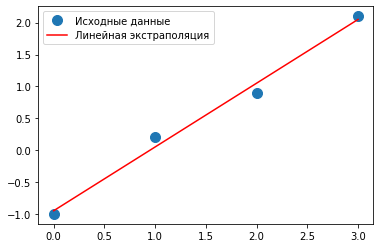

In [2]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

#Перепишем линейное уравнение y = mx + c как y = Ap, где A = [[x 1]] и p = [[m], [c]]
#Построим A по X :

A = np.vstack([x, np.ones(len(x))]).T
print(A)

#Используем метод lstsq для решения его относительно вектора p.
m, c = np.linalg.lstsq(A, y, rcond=None)[0]
print(m, c)

#Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

#### 1.1.2 Пример
Пусть x,y – вектора длиной n > 3 (точек > 3). Задача заключается в построении эстраполяционного полинома второго порядка (параболы). Таким образом, необходимо найти такие коэффициенты полинома a,b,c по методу наименьших квадратов. Данные могут быть получены в результате измерений. Покажем пример генерации данных случайным образом и загрузки их из файла.

[-5.17577107 -4.48495229 -2.93531268 -1.72983436 -0.65313279  0.44387362
  0.96925275  2.14995319  3.28693145  4.44586196  4.57859537]
[25.01239939 16.27956319  9.2229367   3.5622263   1.45192093 -0.37900896
  0.68844584  3.56709542  9.37514478 16.20947771 25.16614438]


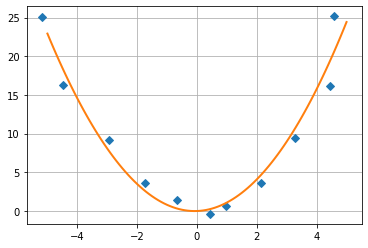

In [4]:
from numpy import *
from numpy.random import *
#генерируем случайные x и y
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записываем данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# задаем вектор m = [x**2, x, E]
m = vstack((x ** 2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

#### 1.1.3 Пример
По данным предыдущего примера постройте эстраполяционного полинома третьего порядка

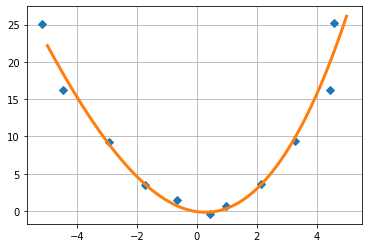

In [5]:
#Решение
# Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [x ** 3, x, E]
m = vstack((x ** 3, x ** 2, x, ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond=None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

#### 1.2.1 Задание
Представьте собственные данные и постройте эктраполяцию полиномами первой, второй и третьей степени.

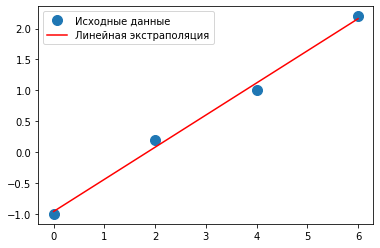

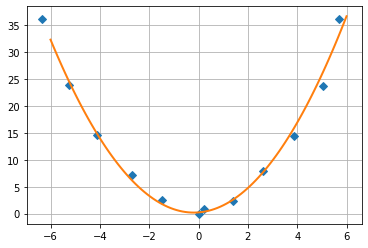

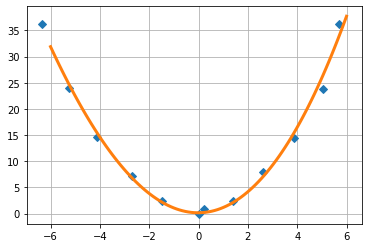

In [10]:
x = array([0,2,4,6])
y = array([-1, 0.2, 1.0, 2.2])

A = vstack((x, ones(len(x)))).T

m, c = np.linalg.lstsq(A, y, rcond=None)[0]

plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r', label='Линейная экстраполяция')
plt.legend()
plt.show()

delta = 1.0
x = linspace(-6, 6, 12)
y = x**2+delta*(rand(12)-0.4)
x += delta*(rand(12)-0.4)

m = vstack((x ** 2, x, ones(12))).T

s = linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-6, 6, 102)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')
plt.show()

m = vstack((x ** 3, x ** 2, x, ones(12))).T

s = linalg.lstsq(m, y, rcond=None)[0]

x_prec = linspace(-6, 6, 102)
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3], '-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')
plt.show()

#### 1.1.4 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится на кривую вида f(x,b) = b0  + b1* exp(-b2x^2)

0.00022141297603925922
0.1170237283134492


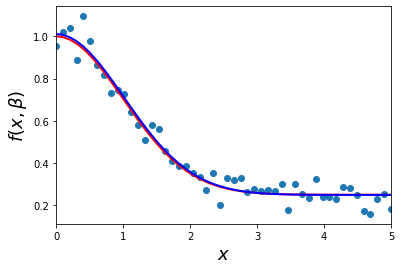

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.95191137 1.02205847 1.03904162 0.88691254 1.09497212 0.97556917
 0.86541387 0.8186049  0.73180916 0.74702102 0.72786157 0.6394661
 0.58181097 0.51141677 0.58052059 0.5614633  0.4592818  0.40951825
 0.38615685 0.38665873 0.35474204 0.33481965 0.27100894 0.35476529
 0.20034738 0.32733639 0.31898562 0.32763719 0.26146574 0.27803131
 0.26628718 0.2721697  0.26982192 0.30227826 0.17652397 0.30090036
 0.2520912  0.23399034 0.32661519 0.238

In [15]:
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * exp(-b2 * x**2)
# зададим массив точек xi
xdata = linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * randn(len(xdata))

#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt

#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

print(xdata)
print(ydata)

#### 1.1.5 Пример
Необходимо проверить гипотезу, что наша точечно заданная функция ложится на кривые вида:
<ol>
    <li>f(x,b) = b0 + b1x</li>
    <li>f(x,b) = b0 + b1x + b2x^2</li>
    <li>f(x,b) = b0 + b1ln(x)</li>
    <li>f(x,b) = b0 * x ^ (b1)</li>
</ol>

[0.24907363 0.75058367]
0.00015114871043973824
0.1329066236505121


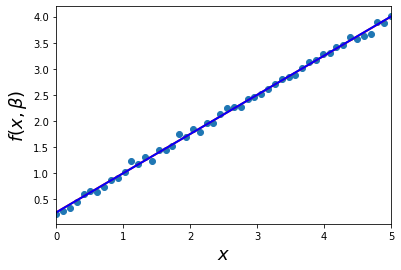

[0.27879383 0.73484444 0.50195051]
0.00011694009774047611
0.09751579339994867


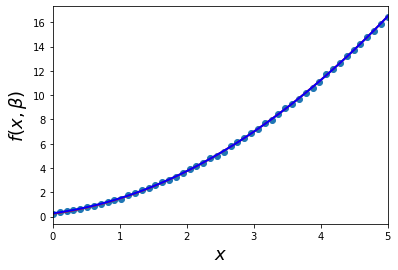

[1.0091872  1.98388239]
4.519797260984864e-05
0.10451766530665145


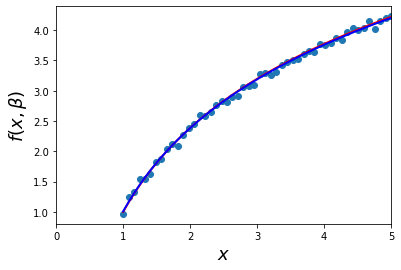

[1.00686824 1.99518456]
4.622846827157304e-06
0.10734581006980062


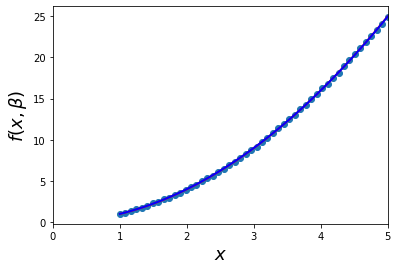

In [16]:
#1
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x

xdata = linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)


residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#2
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

xdata = linspace(0, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)


residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#3
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * log(x)

xdata = linspace(1, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)


residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#4
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1

xdata = linspace(1, 5, 50)

y = f(xdata, *beta)

ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)


residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

#### 1.2.2 Задание
Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

[0.29124872 0.90022462 0.60041419]
4.994589887977598e-05
0.22271268705285052


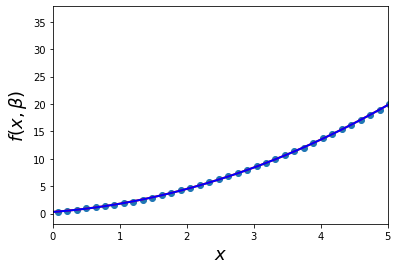

In [24]:
beta = (0.3, 0.9, 0.6)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2

xdata = linspace(-7, 7, 100)

y = f(xdata, *beta)

ydata = y + 0.05 * randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

lin_dev = sum(beta_cov[0])
print(lin_dev)


residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

### 1.2 Задачи регрессии
<p><b>Линейная регрессия</b> - это широко используемый метод статистического анализа, который использует регрессионный анализ в математической статистике для определения количественной взаимосвязи между двумя или более переменными. Если регрессионный анализ включает две или более независимых переменных, а связь между зависимой и независимой переменными является линейной, тогда имееи дело с множественной линейной регрессией.</p><br>
<p>В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного обучения можно использовать для реализации функций регрессии. Мы начнем с простой линейной регрессии с участием двух переменных, а затем перейдем к линейной регрессии с участием нескольких переменных.</p>


#### 1.2.1 Пример
Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

   Учебное время  Оценка
0           0.50      10
1           0.75      22
2           1.00      13
3           1.25      43
4           1.50      20
(20, 2)
       Учебное время     Оценка
count      20.000000  20.000000
mean        2.887500  53.700000
std         1.501041  26.435821
min         0.500000  10.000000
25%         1.687500  30.250000
50%         2.875000  58.500000
75%         4.062500  75.250000
max         5.500000  93.000000


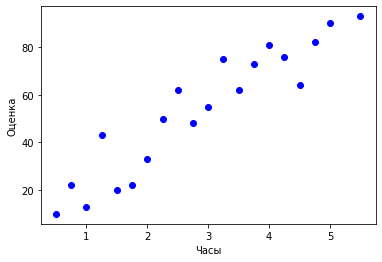

In [37]:
#
#
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#
my_dict = {
    'Учебное время': [0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.5],
    'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]
}

dataset = DataFrame(my_dict)
print(dataset.head(5))

#
print(dataset.shape)
print(dataset.describe())

#
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color='b', label='Данные экзамена')
plt.xlabel('Часы')
plt.ylabel('Оценка')
plt.show()

После того как мы получили представление о данных, разделим информацию на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки – это зависимые переменные, значения которых должны быть предсказаны. В нашем наборе всего два столбца и необходимо предсказать оценку в зависимости от количества часов. Чтобы извлечь атрибуты и метки, выполните следующий скрипт:

In [38]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

#
#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#
#
regressor = LinearRegression()
regressor.fit(x_train, y_train)
#
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
3.168632075471699
[17.18867925]


Получившийся результат можно интерпретировать следующим образом: с каждым затраченным часом на обучение результат экзамена повышается приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы будем использовать наши тестовые данные и посмотрим, насколько точно наш алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на тестовых данных необходимо выполнить следующий код:

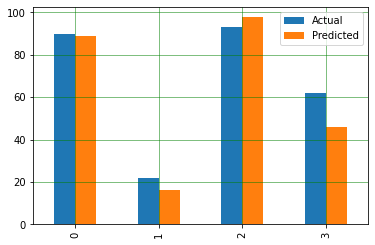

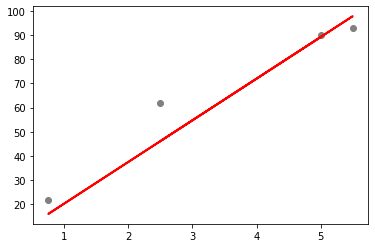

In [39]:
y_pred = regressor.predict(x_test)
#
df = DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

#
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()
#
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

#### 1.2.1 Задание
Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). 
Найдите коэффициенты линии регрессии. Постройте прогноз.

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
(30, 2)
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


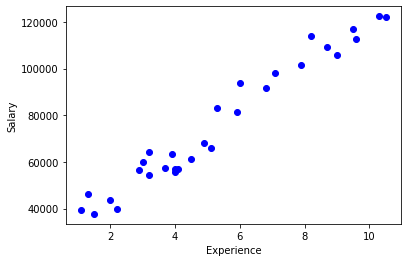

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
26780.09915062818
[9312.57512673]


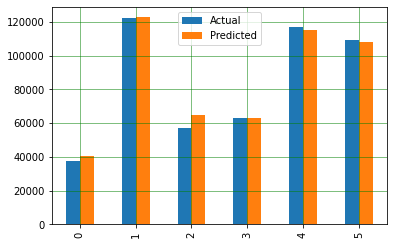

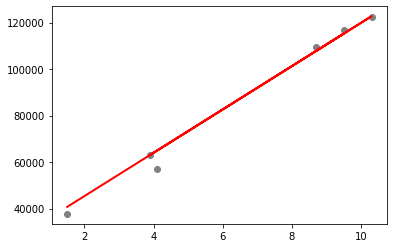

In [43]:
url = r'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)
print(dataset.head(5))

print(dataset.shape)
print(dataset.describe())

plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='b', label='Salary data')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

#
#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
#
#
regressor = LinearRegression()
regressor.fit(x_train, y_train)
#
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(x_test)
df = DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

### 1.3 Множественная регрессия
<p>В предыдущем примере мы проиллюстрировали линейную регрессию с двумя переменными. Однако, почти все реальные задачи имеют больше параметров. Линейная регрессия с участием нескольких переменных называется «множественной линейной регрессией» или многомерной линейной регрессией. Шаги для выполнения множественной линейной регрессии аналогичны шагам для простой . Разница заключается в оценке. Вы можете использовать множественную регрессию, чтобы узнать, какой фактор оказывает наибольшее влияние на прогнозируемый результат или как различные переменные связаны друг с другом.</p>

#### 1.3.1 Пример
Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq.

In [44]:
import numpy as np

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
    [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
    [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

x = np.transpose(x) # transpose to input vectors
x = np.c_[x, np.ones(x.shape[0])] # add bias term
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


Кроме этого можно использовать возможности библиотеки scikit-learn. Рассмотрим пример.

#### 1.3.2 Пример
Для данных из предыдущей задачи построить модель множественной линейной регрессии с использованием средств библиотеки sсikit-learn.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
x = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
    [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
    [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
print(dataset.head())

#изучим данные
print(dataset.shape)
print(dataset.describe())

#разделим данные на метки и атрибуты
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

#раздлеим данные на обуччающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

#выведем кожффициенты модели 
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)
               y         x1         x2         x3
count  23.000000  23.000000  23.000000  23.000000
mean    3.565217   5.347826   5.521739   5.043478
std     1.674029   2.404706   2.428422   2.704849
min     0.000000   0.000000   1.000000   1.000000
25%     3.000000   4.500000   4.000000   3.000000
50%     4.000000   5.000000   6.000000   5.000000
75%     5.000000   6.500000   7.500000   7.000000
max     6.000000   9.000000   9.000000   9.000000
Mean Squared Error: 1.3272699242343067


#### 1.3.1 Задание

In [53]:
url = r'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
dataset = pd.read_csv(url)
print(dataset.head(5))

y = list(dataset['Petrol_tax'])
x = [list(dataset['Average_income']),
        list(dataset['Paved_Highways']),
        list(dataset['Population_Driver_licence(%)']),
        list(dataset['Petrol_Consumption'])]

new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns={0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
print(dataset.head())

print(dataset.shape)
print(dataset.describe())

x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410  
   y      x1      x2     x3      3
0  1  3571.0  1976.0  0.525  541.0
1  2  4092.0  1250.0  0.572  524.0
2  3  3865.0  1586.0  0.580  561.0
3  4  4870.0  2351.0  0.529  414.0
4  3  4399.0   431.0  0.544  410.0
(23, 5)
               y           x1            x2         x3           3
count  23.000000    23.000000     23.000000  23.000000   23.000000
mean    3.565217  4529.913043